In [1]:
import matplotlib.pyplot as plt
import numpy as np

import matplotlib.animation as animation

In [2]:
# Curvas
def parabola(x):
    return 1/16 * x**2 - (1/2) * x

def reta(x):
    return -x/4

def inversa(x):
    return 1/(x + 1) - x/20 - 1

# Retorna a "função norma da velocidade" da curva. A norma da velocidade, como dado na modelagem,
# é sempre sqrt(2gy). O sinal de menos é pra considerar que na modelagem o eixo y aponta para baixo. 
# (caso contrário haveria raíz de números negativos)
def velocidade_escalar(f):
    return lambda ponto : np.sqrt(2 * 9.8 * -f(ponto))

In [3]:
# "funcao" é a "função norma da derivada" da curva. anda_comprimento calcula o 
# comprimento de arco (que é a integral dessa função) com o método do trapézio e
# retorna quanto a partícula andou no eixo x se ela percorrer o comprimento dado (andando pela curva)
def anda_comprimento(funcao, inicio, comprimento):
    delta = 0.000001
    percorrido = 0

    while percorrido < comprimento:
        percorrido += funcao(inicio) * delta
        inicio += delta
    return inicio

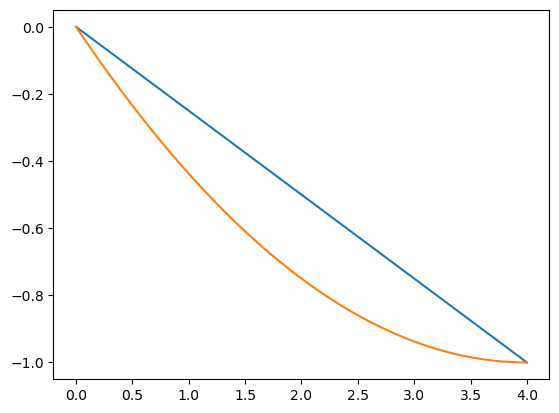

In [4]:
# Intervalo entre os frames, em ms
interval = 30
delta_t = interval / 1000

fig, ax = plt.subplots()

x = np.linspace(0, 4, 2000)
y = reta(x)
plt.plot(x, y)

y = parabola(x)
plt.plot(x, y)

bolinha_reta = ax.scatter(0.001, 0.001)
bolinha_parabola = ax.scatter(0.001, 0.001)

# Função norma da derivada de cada uma das curvas
v_reta = velocidade_escalar(reta)
v_parabola = velocidade_escalar(parabola)

def update(frame):
    # Reta
    coord_x = bolinha_reta.get_offsets()[0][0]
    # Já que o tempo de percurso é distância / velocidade, distancia percorrida = tempo * velocidade
    deslocamento = delta_t * v_reta(coord_x) 
    coord_x = anda_comprimento(v_reta, coord_x, deslocamento)
    
    coord_y = reta(coord_x)
    bolinha_reta.set_offsets([coord_x, coord_y])
    
    # Parabola
    coord_x = bolinha_parabola.get_offsets()[0][0]
    deslocamento = delta_t * v_parabola(coord_x)
    coord_x = anda_comprimento(v_parabola, coord_x, deslocamento)

    coord_y = parabola(coord_x)
    bolinha_parabola.set_offsets([coord_x, coord_y])

    return (bolinha_reta, bolinha_parabola)
    
ani = animation.FuncAnimation(fig=fig, func=update, frames=200, interval=interval, repeat=True)

ani.save(filename="teste.gif", writer="pillow")